##### Adapted from: 
##### https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
##### https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [31]:
import pandas as pd
import numpy as np

# DEFINE THE DATASET
sales_data = pd.read_csv('..\\data\\train.csv')
sales_data = sales_data.select_dtypes(include=[np.number])
sales_data = sales_data.dropna(axis=0)

# drop columns by Name
sales_data = sales_data.drop(['FID', 'FID_2', 'GPID', 'GPID_2', 'pop_chng_p'], axis=1)

# convert negative values to absolute 
sales_data['LON'] = sales_data['LON'].abs()

# define X and y
X = sales_data.loc[:, sales_data.columns != 'SELL_PRICE']  #independent columns
y = sales_data.SELL_PRICE   #target column i.e. price range


### Classification and Regression Trees - DecisionTreeRegressor

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


### Classification and Regression Trees - ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### Classification and Regression Trees - Random Forest Regression

         Specs     Score
62  LIST_PRICE  0.537202
69     ASS_AMT  0.134342
71     TAX_AMT  0.131800
66   SIZE_SQFT  0.072032
35    bach_pct  0.019117
39    doct_pct  0.008073
25     ave_val  0.007279
73    LOT_FRNT  0.006549
32     rent_av  0.005356
75         LON  0.004810
48  mvrs_1yr_p  0.004069
16  pop_age_av  0.003523
0   Shape__Are  0.003343
15  65_pls_pct  0.002569
74         LAT  0.002344
23     ave_inc  0.002221
12   20_24_pct  0.002209
14   15_64_pct  0.002047
72    LOT_DPTH  0.002046
58   walkscore  0.001895


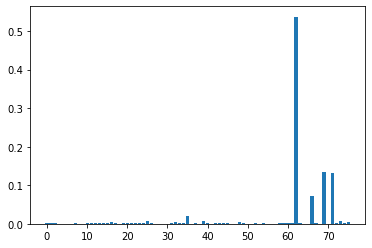

In [6]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Classification and Regression Trees - Random Forest Classifier

         Specs     Score
50    noise_km  0.024694
60      ws_ave  0.023467
73    LOT_FRNT  0.022649
69     ASS_AMT  0.022332
75         LON  0.022074
61      bs_ave  0.021357
74         LAT  0.020918
15  65_pls_pct  0.020674
25     ave_val  0.019846
62  LIST_PRICE  0.019530
52    bylaw_km  0.019240
71     TAX_AMT  0.019006
49  mvrs_3yr_p  0.018766
14   15_64_pct  0.018681
58   walkscore  0.017612
72    LOT_DPTH  0.017302
5     pop_dens  0.017160
57    trees_km  0.015897
45    walk_pct  0.015673
54    total_km  0.015454


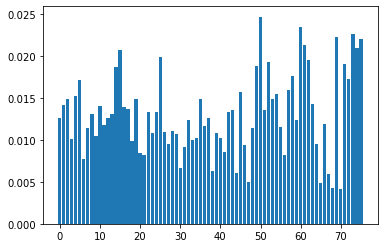

In [13]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Univariate Selection - SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features


### XGBoost Regression

         Specs     Score
66   SIZE_SQFT  0.479807
69     ASS_AMT  0.302530
62  LIST_PRICE  0.078457
71     TAX_AMT  0.060032
49  mvrs_3yr_p  0.017358
73    LOT_FRNT  0.008703
6    land_area  0.008271
72    LOT_DPTH  0.007988
23     ave_inc  0.006915
11   20_24_yrs  0.006832
57    trees_km  0.004152
28       rentr  0.003242
12   20_24_pct  0.002224
74         LAT  0.001950
47   bicyc_pct  0.001693
58   walkscore  0.001493
68      ASS_YR  0.001447
7   dwell_dens  0.001197
64       BDRMS  0.000812
35    bach_pct  0.000709


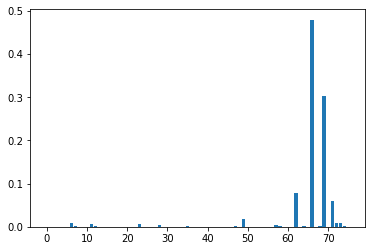

In [14]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### XGBoost Classification

C:\Users\Shane\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
         Specs     Score
56  Ave_Rating  0.057602
42     transit  0.038688
15  65_pls_pct  0.037535
35    bach_pct  0.036418
71     TAX_AMT  0.031281
72    LOT_DPTH  0.026527
58   walkscore  0.024706
25     ave_val  0.023750
14   15_64_pct  0.022614
54    total_km  0.022122
24  median_val  0.022079
62  LIST_PRICE  0.020124
39    doct_pct  0.018385
13    0_14_pct  0.018030
7   dwell_dens  0.017667
74         LAT  0.017634
69     ASS_AMT  0.016886
51     bark_km  0.014373
49  mvrs_3yr_p  0.013049
0   Shape__Are  0.012976


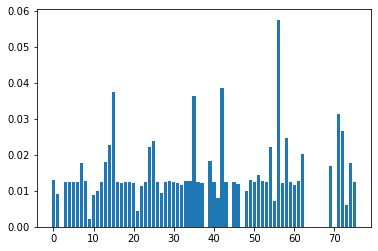

In [15]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Permutation Feature Importance for Regression

         Specs         Score
62  LIST_PRICE  7.332955e+10
69     ASS_AMT  7.533118e+09
25     ave_val  2.165715e+08
24  median_val  2.116675e+08
1        DAUID  0.000000e+00
2        DA_ID  0.000000e+00
3   pop_2016_2  0.000000e+00
4     pop_2011  0.000000e+00
5     pop_dens  0.000000e+00
6    land_area  0.000000e+00
7   dwell_dens  0.000000e+00
8     0_14_yrs  0.000000e+00
9    15_64_yrs  0.000000e+00
10  65_plus_yr  0.000000e+00
11   20_24_yrs  0.000000e+00
12   20_24_pct  0.000000e+00
13    0_14_pct  0.000000e+00
14   15_64_pct  0.000000e+00
15  65_pls_pct  0.000000e+00
16  pop_age_av  0.000000e+00


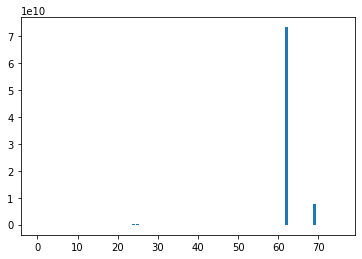

In [16]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Permutation Feature Importance for Classification

         Specs         Score
62         DOM  7.332955e+10
69      TAX_YR  7.533118e+09
25     ave_val  2.165715e+08
24  median_val  2.116675e+08
1        DAUID  0.000000e+00
2        DA_ID  0.000000e+00
3   pop_2016_2  0.000000e+00
4     pop_2011  0.000000e+00
5     pop_dens  0.000000e+00
6    land_area  0.000000e+00
7   dwell_dens  0.000000e+00
8     0_14_yrs  0.000000e+00
9    15_64_yrs  0.000000e+00
10  65_plus_yr  0.000000e+00
11   20_24_yrs  0.000000e+00
12   20_24_pct  0.000000e+00
13    0_14_pct  0.000000e+00
14   15_64_pct  0.000000e+00
15  65_pls_pct  0.000000e+00
16  pop_age_av  0.000000e+00


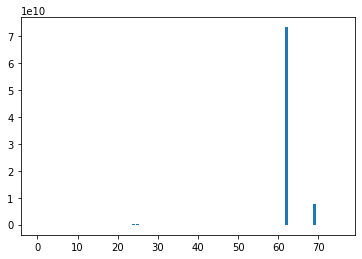

In [19]:
# permutation feature importance with knn for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X, y)

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Feature Selection with Importance

In [25]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 84.55


# =END OF WORKING CODE= 

### Linear Regression Feature Importance
##### This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# assign importance and columns to dataframes
dfimportance = pd.DataFrame(importance)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfimportance],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
